# **Logistic Regression + PCA**


PCA (Principal Component Analysis) is a statistical technique used for dimensionality reduction. Dimensionality reduction involves reducing the number of variables under consideration while retaining as much information as possible. PCA achieves this by transforming the original variables into a new set of variables, called principal components, which are linear combinations of the original variables.



## Import Python libraries

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# ignore warnings
import warnings
warnings.filterwarnings('ignore')




import os

# Any results you write to the current directory are saved as output.

## Import dataset

In [3]:
%%time

file = ('Churn_Modelling.csv')
df = pd.read_csv(file, encoding='latin-1')

Wall time: 72.9 ms


### Check shape of dataset

In [4]:
df.shape

(10000, 14)

We can see that there are 32561 instances and 15 attributes in the data set.

### Preview dataset

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### View summary of dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.drop(columns=['Surname'], inplace=True)

Now we can see that there are no missing values in the dataset.

### Setting feature vector and target variable

In [14]:
X = df.drop(['Exited'], axis=1)

y = df['Exited']

In [15]:
X.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Encode categorical variables

In [21]:
from sklearn import preprocessing

categorical = ['Geography', 'Gender']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [22]:
X_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7681,7682,15633608,Black,641,0,1,33,2,146193.60,2,1,1,55796.83
9031,9032,15742323,Barese,541,0,1,39,7,0.00,2,1,0,19823.02
3691,3692,15760244,Ives,590,0,0,76,5,160979.68,1,0,1,13848.58
202,203,15600974,He,516,2,1,50,5,0.00,1,0,1,146145.93
5625,5626,15663234,Bishop,508,0,0,60,7,143262.04,1,1,1,129562.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,9226,15584928,Ugochukwutubelum,594,1,0,32,4,120074.97,2,1,1,162961.79
4859,4860,15647111,White,794,2,0,22,4,114440.24,1,1,1,107753.07
3264,3265,15574372,Hoolan,738,0,1,35,5,161274.05,2,1,0,181429.87
9845,9846,15664035,Parsons,590,2,0,38,9,0.00,2,1,1,148750.16


In [23]:
X_train.drop(columns=['Surname'], inplace=True)

In [28]:
X_test.drop(columns=['Surname'], inplace=True)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [30]:
X_train.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.927821,-0.811550,-0.097921,-0.892383,0.922958,-0.557598,-1.036351,1.132494,0.810394,0.641985,0.966835,-0.768624
1,1.394577,0.706821,-1.126120,-0.892383,0.922958,0.017259,0.697009,-1.199755,0.810394,0.641985,-1.034302,-1.393599
2,-0.451701,0.957115,-0.622303,-0.892383,-1.083473,3.562216,0.003665,1.368379,-0.929716,-1.557669,0.966835,-1.497393
3,-1.658005,-1.267334,-1.383170,1.520395,0.922958,1.071165,0.003665,-1.199755,-0.929716,-1.557669,0.966835,0.801015
4,0.216970,-0.397778,-1.465426,-0.892383,-1.083473,2.029262,0.697009,1.085727,-0.929716,0.641985,0.966835,0.512914


## Logistic Regression model with all features

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.4507


## Logistic Regression with PCA

Scikit-Learn's PCA class implements PCA algorithm using the code below. Before diving deep, I will explain another important concept called explained variance ratio.


### Explained Variance Ratio

A very useful piece of information is the **explained variance ratio** of each principal component. It is available via the `explained_variance_ratio_ ` variable. It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

Now, let's get to the PCA implementation.


In [32]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_


array([0.11087033, 0.09331212, 0.08651874, 0.08539552, 0.08454592,
       0.08357877, 0.08274778, 0.08170223, 0.08064435, 0.08037866,
       0.07428108, 0.05602451])

### Logistic Regression with first 11 features

In [34]:
X = df.drop(['Exited','EstimatedSalary'], axis=1)
y = df['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Geography', 'Gender']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 11 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Logistic Regression accuracy score with the first 11 features: 0.8020


### Comment

- We can see that accuracy has been increased from 0.45 to 0.80 after dropping the last feature.


### Logistic Regression with first 10 features

In [37]:
X = df.drop(['Exited','EstimatedSalary', 'IsActiveMember'], axis=1)
y = df['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Geography', 'Gender']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 10 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Logistic Regression accuracy score with the first 10 features: 0.7790


### Comment

- Now, it can be seen that the accuracy has been decreased to 0.779, if the model is trained with 10 features.


### Logistic Regression with first 9 features

In [38]:
X = df.drop(['Exited','EstimatedSalary', 'IsActiveMember','HasCrCard'], axis=1)
y = df['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Geography', 'Gender']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 9 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Logistic Regression accuracy score with the first 11 features: 0.7790


### Comment

- We can see that accuracy has not changed that is 0.7790 if I drop the last three features.


## Select right number of dimensions

- The above process works well if the number of dimensions are small.

- But, it is quite cumbersome if we have large number of dimensions.

- In that case, a better approach is to compute the number of dimensions that can explain significantly large portion of the variance.

- The following code computes PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 90% of the training set variance.

In [39]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Geography', 'Gender']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 11


## Plot explained variance ratio with number of dimensions

- An alternative option is to plot the explained variance as a function of the number of dimensions.

- In the plot, we should look for an elbow where the explained variance stops growing fast.

- This can be thought of as the intrinsic dimensionality of the dataset.

- Now, I will plot cumulative explained variance ratio with number of components to show how variance ratio varies with number of components.

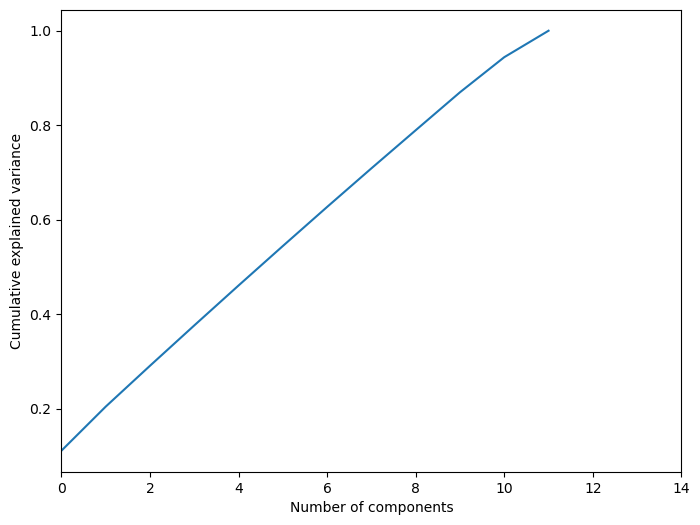

In [40]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

### Comment

The above plot shows that almost 90% of variance is explained by the first 11 components.

## References

The ideas and concepts in this kernel are taken from the following book.

- Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurelien Geron.